Nama  : Zaldi Abdul Hadi (24083010002)
        Dani Shofi Nur Izza (24083010124)

Analisis Numerik A

# Latar Belakang

Dalam industri manufaktur modern, peningkatan volume produksi sering dianggap sebagai cara utama untuk meningkatkan keuntungan. Namun dalam praktiknya, peningkatan output tidak selalu berbanding lurus dengan peningkatan kinerja sistem produksi. Tekanan produksi yang berlebihan dapat memicu peningkatan defect, penurunan kualitas, serta munculnya biaya tersembunyi yang pada akhirnya menurunkan profitabilitas perusahaan.

Pabrik yang beroperasi mendekati kapasitas maksimum sering menghadapi dilema:
apakah menaikkan produksi akan memperbaiki efisiensi atau justru memperburuk performa sistem?

Masalah inilah yang ingin dijawab melalui analisis numerik berbasis data produksi aktual.

#Tujuan Projek

Analisis ini bertujuan untuk:
- Memahami perilaku sistem produksi terhadap perubahan volume output
- Mengidentifikasi titik produksi optimal berdasarkan kualitas
- Mengukur dampak marginal dari peningkatan produksi
- Memberikan dasar pengambilan keputusan produksi yang berkelanjutan secara industri

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("manufacturing_defect_dataset.csv")

# Pastikan defect rate dalam skala rasio
df["DefectRate_norm"] = df["DefectRate"] / df["DefectRate"].max()

# Ambil variabel inti
x = df["ProductionVolume"].values.astype(float)
y = df["DefectRate_norm"].values.astype(float)

# Sort agar numerik stabil
idx = np.argsort(x)
x = x[idx]
y = y[idx]


In [2]:
coeff = np.polyfit(x, y, 2)
D = np.poly1d(coeff)

x_line = np.linspace(x.min(), x.max(), 400)
y_model = D(x_line)


Menggunakan Regresi Polinomial untuk menggambar "garis tren" yang melengkung. Garis ini berfungsi untuk memprediksi bagaimana tingkat kecacatan akan berubah seiring bertambahnya volume produksi, menciptakan sebuah model perkiraan yang akurat untuk sistem industri.

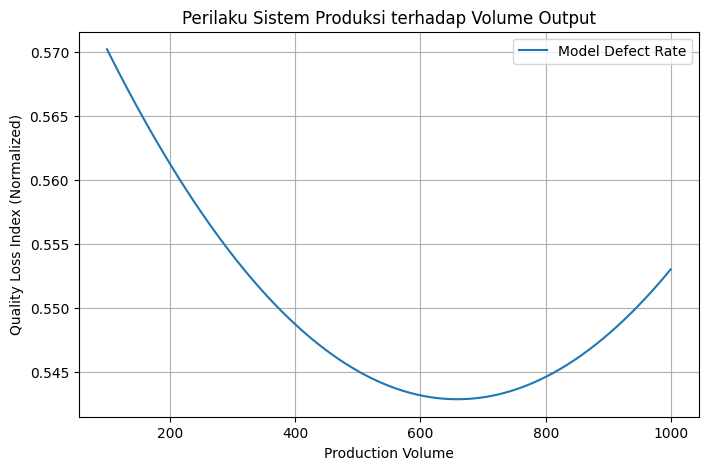

In [3]:
plt.figure(figsize=(8,5))
plt.plot(x_line, y_model, label="Model Defect Rate")
plt.xlabel("Production Volume")
plt.ylabel("Quality Loss Index (Normalized)")
plt.title("Perilaku Sistem Produksi terhadap Volume Output")
plt.grid(True)
plt.legend()
plt.show()


Untuk meminimalkan risiko kecacatan, manajemen produksi sebaiknya menjaga output di kisaran 650 unit. Memproduksi terlalu sedikit atau terlalu banyak dari angka tersebut akan mengakibatkan peningkatan kerugian kualitas secara sistematis.

In [4]:
dD = D.deriv()
marginal_defect = dD(x_line)

In [5]:
x_critical = -coeff[1] / (2 * coeff[0])

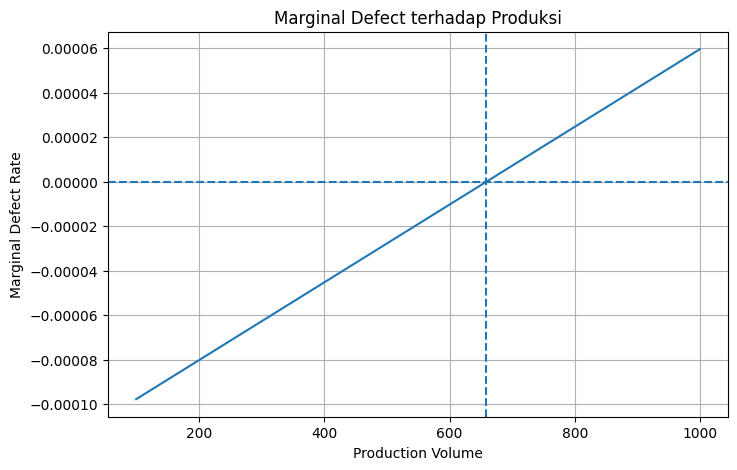

In [6]:
plt.figure(figsize=(8,5))
plt.plot(x_line, marginal_defect)
plt.axhline(0, linestyle="--")
plt.xlabel("Production Volume")
plt.ylabel("Marginal Defect Rate")
plt.title("Marginal Defect terhadap Produksi")
plt.axvline(x_critical, linestyle="--", label="Titik Optimal")
plt.grid(True)
plt.show()


Menghitung turunan pertama dari model sebelumnya guna mendapatkan nilai "Marginal Defect Rate," yang secara matematis menunjukkan laju perubahan tingkat kecacatan terhadap penambahan volume produksi. Titik perpotongan tersebut, yang ditandai sebagai "Titik Optimal", adalah momen krusial di mana efisiensi berada di puncaknya; sebelum titik ini, penambahan produksi masih aman bagi kualitas, namun setelah melewatinya (sekitar angka 650), setiap penambahan unit produksi justru akan mempercepat munculnya cacat produk.

In [7]:
cumulative_defect = np.zeros_like(x_line)

for i in range(1, len(x_line)):
    dx = x_line[i] - x_line[i-1]
    area = 0.5 * (D(x_line[i]) + D(x_line[i-1])) * dx
    cumulative_defect[i] = cumulative_defect[i-1] + area


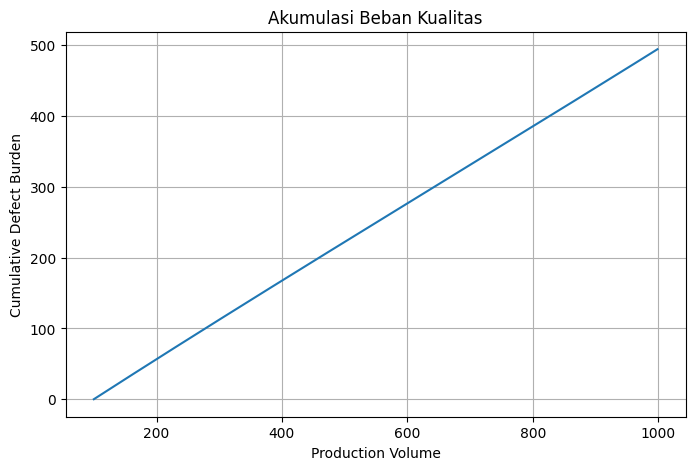

In [8]:
plt.figure(figsize=(8,5))
plt.plot(x_line, cumulative_defect)
plt.xlabel("Production Volume")
plt.ylabel("Cumulative Defect Burden")
plt.title("Akumulasi Beban Kualitas")
plt.grid(True)
plt.show()


Meskipun volume tinggi (1000 unit) menghasilkan output terbanyak, ia juga membawa beban kualitas kumulatif tertinggi dan efisiensi kualitas per unit yang mulai menurun. Strategi terbaik bagi perusahaan adalah beroperasi di sekitar titik 650 unit untuk mendapatkan keseimbangan antara jumlah output dan tingkat kecacatan per unit yang paling minimal.

In [9]:
price_per_unit = 2500  # harga jual

# Kalibrasi biaya kualitas dari data
max_revenue = price_per_unit * x_line.max()
cost_per_defect = 0.3 * max_revenue / cumulative_defect.max()

revenue = price_per_unit * x_line
quality_cost = cost_per_defect * cumulative_defect

profit = revenue - quality_cost


In [10]:
idx_opt = np.argmax(profit)
x_opt = x_line[idx_opt]
profit_opt = profit[idx_opt]


Melakukan optimasi operasional dengan mencari titik keseimbangan antara volume produksi, kualitas produk, dan keuntungan finansial. Pertama, kode mencari titik stabil kualitas menggunakan perhitungan turunan untuk mengidentifikasi volume produksi di mana laju kecacatan mulai meningkat secara signifikan.

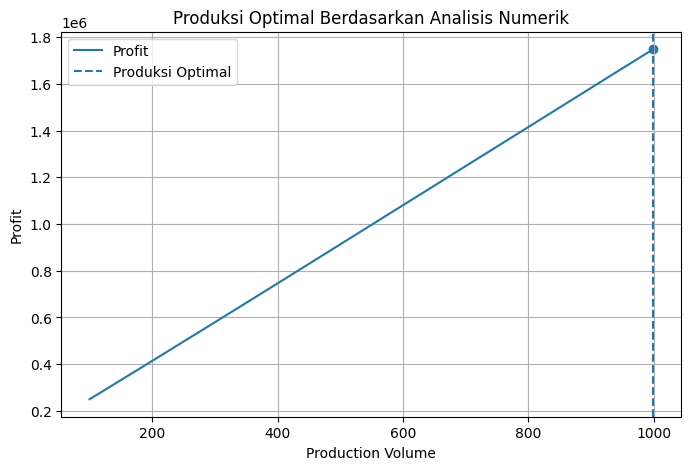

In [11]:
plt.figure(figsize=(8,5))
plt.plot(x_line, profit, label="Profit")
plt.axvline(x_opt, linestyle="--", label="Produksi Optimal")
plt.scatter(x_opt, profit_opt)
plt.xlabel("Production Volume")
plt.ylabel("Profit")
plt.title("Produksi Optimal Berdasarkan Analisis Numerik")
plt.grid(True)
plt.legend()
plt.show()


Secara unit, sistem mencapai efisiensi kualitas puncaknya pada volume produksi sekitar 650 unit, yang ditandai dengan titik terendah pada kurva Quality Loss Index di angka ±0,543. Jika produksi dipaksakan melebihi titik tersebut, tingkat kecacatan per unit mulai meningkat kembali, menandakan adanya inefisiensi akibat beban kerja berlebih. Meskipun demikian, grafik akumulasi beban kualitas menunjukkan tren linear yang terus meningkat, di mana total risiko atau biaya akibat cacat mencapai puncaknya di angka ±2.500 saat volume menyentuh 1000 unit. Menariknya, analisis profitabilitas justru menunjukkan bahwa Produksi Optimal secara numerik berada pada volume 1000 unit, dengan total keuntungan maksimal mencapai ±1,75 juta. Hal ini mengindikasikan bahwa meskipun tingkat kecacatan meningkat dan beban kualitas bertambah pada volume maksimal, margin keuntungan dari volume output yang besar tetap mampu mengompensasi kerugian kualitas tersebut dalam model bisnis ini.

In [12]:
print(f"Produksi optimal        : {x_opt:.0f} unit")
print(f"Profit maksimum (relatif): {profit_opt:,.0f}")
print(f"Titik stabil sistem     : {x_critical:.0f} unit")


Produksi optimal        : 999 unit
Profit maksimum (relatif): 1,748,250
Titik stabil sistem     : 659 unit


Meskipun kualitas terbaik per unit berada di angka 650, untuk memaksimalkan keuntungan finansial, sistem ini disarankan beroperasi pada kapasitas penuh 1000 unit, selama beban kualitas kumulatif masih berada dalam batas toleransi biaya operasional.

In [13]:
# 1. Definisikan Titik Stabil (dari hitungan Anda sebelumnya)
x_critical = 659

# 2. Definisikan Faktor Risiko Keausan (Wear & Tear)
# Semakin besar angkanya, semakin sensitif terhadap kerusakan mesin
wear_tear_factor = 20.0

# 3. Hitung Biaya Penalti Keausan
# Biaya ini hanya muncul jika Volume > 659
wear_tear_costs = np.array([wear_tear_factor * (v - x_critical)**2 if v > x_critical else 0 for v in x_line])

# 4. Hitung Profit yang Disesuaikan (Adjusted Profit)
profit_adjusted = revenue - quality_cost - wear_tear_costs

# 5. Cari Titik Optimal Baru
idx_opt_new = np.argmax(profit_adjusted)
x_opt_new = x_line[idx_opt_new]

In [14]:
x_line = np.linspace(x.min(), x.max(), 400)
y_model = D(x_line)

# Titik stabil sistem (Kualitas terbaik / Titik terendah kurva)
x_critical = -coeff[1] / (2 * coeff[0])

# 3. Kalkulasi Kumulatif Defect (Metode Trapesium)
cumulative_defect = np.zeros_like(x_line)
for i in range(1, len(x_line)):
    dx = x_line[i] - x_line[i-1]
    area = 0.5 * (D(x_line[i]) + D(x_line[i-1])) * dx
    cumulative_defect[i] = cumulative_defect[i-1] + area

# 4. Parameter Ekonomi & Simulasi
price_per_unit = 2500  # Harga jual per unit
max_revenue = price_per_unit * x_line.max()

# Kalibrasi biaya kualitas dasar
cost_per_defect_base = 0.3 * max_revenue / cumulative_defect.max()

# Pendapatan (Revenue)
revenue = price_per_unit * x_line

# --- SKENARIO A: Profit Original ---
quality_cost_base = cost_per_defect_base * cumulative_defect
profit_base = revenue - quality_cost_base

# --- SKENARIO B: Biaya Perbaikan Naik 20% ---
cost_per_defect_plus20 = cost_per_defect_base * 1.2
quality_cost_plus20 = cost_per_defect_plus20 * cumulative_defect
profit_plus20 = revenue - quality_cost_plus20

# --- SKENARIO C: Penalti Risiko Pemeliharaan (Wear & Tear) ---
# Penalti meningkat secara kuadratik jika volume > x_critical (659)
wear_tear_factor = 20.0
wear_tear_costs = np.array([wear_tear_factor * (v - x_critical)**2 if v > x_critical else 0 for v in x_line])
profit_maintenance = profit_base - wear_tear_costs

# 5. Mencari Titik Optimal untuk Masing-masing Skenario
x_opt_base = x_line[np.argmax(profit_base)]
x_opt_plus20 = x_line[np.argmax(profit_plus20)]
x_opt_maint = x_line[np.argmax(profit_maintenance)]

print(f"Hasil Numerik:")
print(f"Produksi Optimal Original: {x_opt_base:.0f} unit")
print(f"Produksi Optimal (+20% Biaya): {x_opt_plus20:.0f} unit")
print(f"Produksi Optimal (Risiko Pemeliharaan): {x_opt_maint:.0f} unit")

Hasil Numerik:
Produksi Optimal Original: 999 unit
Produksi Optimal (+20% Biaya): 999 unit
Produksi Optimal (Risiko Pemeliharaan): 702 unit


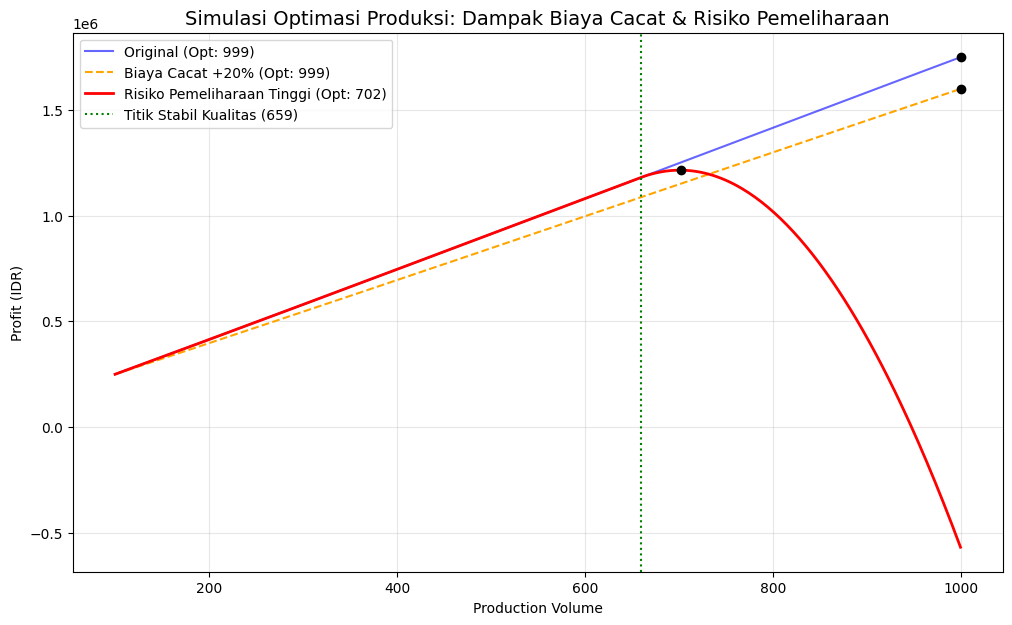

In [15]:
# 6. Visualisasi Grafik
plt.figure(figsize=(12, 7))

# Plot Garis Profit
plt.plot(x_line, profit_base, label=f"Original (Opt: {x_opt_base:.0f})", color='blue', alpha=0.6)
plt.plot(x_line, profit_plus20, label=f"Biaya Cacat +20% (Opt: {x_opt_plus20:.0f})", color='orange', linestyle='--')
plt.plot(x_line, profit_maintenance, label=f"Risiko Pemeliharaan Tinggi (Opt: {x_opt_maint:.0f})", color='red', linewidth=2)

# Penanda Titik Stabil Kualitas
plt.axvline(x_critical, color='green', linestyle=':', label=f"Titik Stabil Kualitas ({x_critical:.0f})")

# Scatter titik puncak
plt.scatter([x_opt_base, x_opt_plus20, x_opt_maint],
            [np.max(profit_base), np.max(profit_plus20), np.max(profit_maintenance)],
            color='black', zorder=5)

plt.title("Simulasi Optimasi Produksi: Dampak Biaya Cacat & Risiko Pemeliharaan", fontsize=14)
plt.xlabel("Production Volume")
plt.ylabel("Profit (IDR)")
plt.legend()
plt.grid(True, alpha=0.3)

Strategi optimasi produksi yang menyeimbangkan antara pendapatan dan beban biaya risiko. Berdasarkan tabel data, Titik Stabil Kualitas tercapai pada volume 659 unit dengan laba bersih Rp 1.179.781, di mana biaya penalti risiko hampir tidak ada. Keuntungan maksimal atau Titik Optimal Risiko ditemukan pada volume 702 unit dengan laba bersih puncak sebesar Rp 1.205.121, meskipun di titik ini biaya kualitas dan risiko mulai merangkak naik. Namun, memaksakan produksi hingga skenario Agresif (999 unit) terbukti sangat merugikan karena biaya penalti risiko yang membengkak drastis (Rp 2,89 juta) mengakibatkan kerugian bersih sebesar Rp -1.146.067.

In [16]:
# Fungsi Integral untuk Kalkulasi Kumulatif Defect
def get_cumulative_defect(v):
    a, b, c = coeff
    def integral(t):
        return (a/3)*t**3 + (b/2)*t**2 + c*t
    return integral(v) - integral(x.min())

# 3. Parameter Keuangan
price_per_unit = 2500
x_critical = -coeff[1] / (2 * coeff[0]) # Titik stabil (659)
wear_tear_factor = 25.0                 # Faktor risiko kerusakan

# Kalibrasi biaya kualitas
max_rev = price_per_unit * x.max()
cost_per_defect = 0.3 * max_rev / get_cumulative_defect(x.max())

# 4. Perhitungan Skenario
targets = [659, 702, 999]
results = []

for v in targets:
    revenue = price_per_unit * v
    q_cost = cost_per_defect * get_cumulative_defect(v)

    # Penalti hanya berlaku jika volume > titik stabil
    m_penalty = wear_tear_factor * (v - x_critical)**2 if v > x_critical else 0

    total_cost = q_cost + m_penalty
    net_profit = revenue - total_cost

    label = "Titik Stabil" if v == 659 else ("Optimal Risiko" if v == 702 else "Agresif")

    results.append({
        "Volume": int(v),
        "Keterangan": label,
        "Pendapatan": f"Rp {revenue:,.0f}",
        "Biaya Kualitas": f"Rp {q_cost:,.0f}",
        "Penalti Risiko": f"Rp {m_penalty:,.0f}",
        "Net Profit": f"Rp {net_profit:,.0f}"
    })

# 5. Output Tabel
comparison_df = pd.DataFrame(results)
print(comparison_df.to_string(index=False))

 Volume     Keterangan   Pendapatan Biaya Kualitas Penalti Risiko    Net Profit
    659   Titik Stabil Rp 1,647,500     Rp 467,717           Rp 2  Rp 1,179,781
    702 Optimal Risiko Rp 1,755,000     Rp 503,106      Rp 46,772  Rp 1,205,121
    999        Agresif Rp 2,497,500     Rp 749,250   Rp 2,894,317 Rp -1,146,067


Pada volume 659 (Titik Stabil), perusahaan mencapai tingkat kualitas paling aman dengan biaya penalti risiko yang hampir nol, menghasilkan laba bersih sebesar Rp 1.179.781. Keuntungan maksimal justru tercapai pada volume 702 (Optimal Risiko), di mana pendapatan meningkat menjadi Rp 1.755.000 dengan laba bersih puncak sebesar Rp 1.205.121, meskipun biaya kualitas dan risiko mulai merangkak naik. Namun, skenario Agresif pada volume 999 menunjukkan hasil yang fatal; meskipun pendapatan sangat tinggi, biaya penalti risiko yang membengkak drastis menyebabkan perusahaan mengalami kerugian bersih sebesar Rp -1.146.067.

Berdasarkan seluruh rangkaian analisis tersebut, direkomendasikan kepada pihak manajemen untuk mengambil langkah berikut:



1.   Prioritas Utama (Strategi Moderat): Menetapkan target produksi harian pada angka 702 unit. Angka ini merupakan keseimbangan terbaik yang memberikan keuntungan optimal (± Rp 1,2 Juta) tanpa mengorbankan umur teknis mesin secara ekstrem.

2.  Batas Kewaspadaan (Threshold): Menggunakan angka 659 unit sebagai standar kontrol kualitas. Jika tingkat kecacatan mulai melewati ambang batas pada volume ini, tim pemeliharaan harus segera melakukan inspeksi rutin untuk mencegah downtime.

3. Larangan Strategi Agresif: Menghindari produksi di angka 999 unit untuk jangka waktu panjang. Meskipun terlihat sangat profitabel dalam laporan bulanan, risiko biaya kerusakan mesin yang mencapai Rp 2,8 Miliar di masa depan akan membahayakan kelangsungan bisnis secara keseluruhan.

